# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels

In [2]:
#conda update conda

In [3]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Seaborn version: 0.11.1
Matplotlib version: 3.3.4
Sklearn version: 0.24.1
Statsmodels version: 0.12.2


## Read the data from the '.csv' file as a monthly Time Series.

In [4]:
df = pd.read_csv('Sales_quantity.csv')
df.head()

,Sales_quantity
0,12729
1,11636
2,15922
3,15227
4,8620


In [5]:
Time_Stamp = pd.date_range(start='2015-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

In [6]:
df['Time_Stamp'] = Time_Stamp
df.head()

,Sales_quantity,Time_Stamp
0,12729,2015-01-31
1,11636,2015-02-28
2,15922,2015-03-31
3,15227,2015-04-30
4,8620,2015-05-31


Advisable to change the time series as the index

In [7]:
df.set_index(keys='Time_Stamp',inplace=True)
df

,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620
...,...
2019-12-31,38069
2020-01-31,27184
2020-02-29,23509


## Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

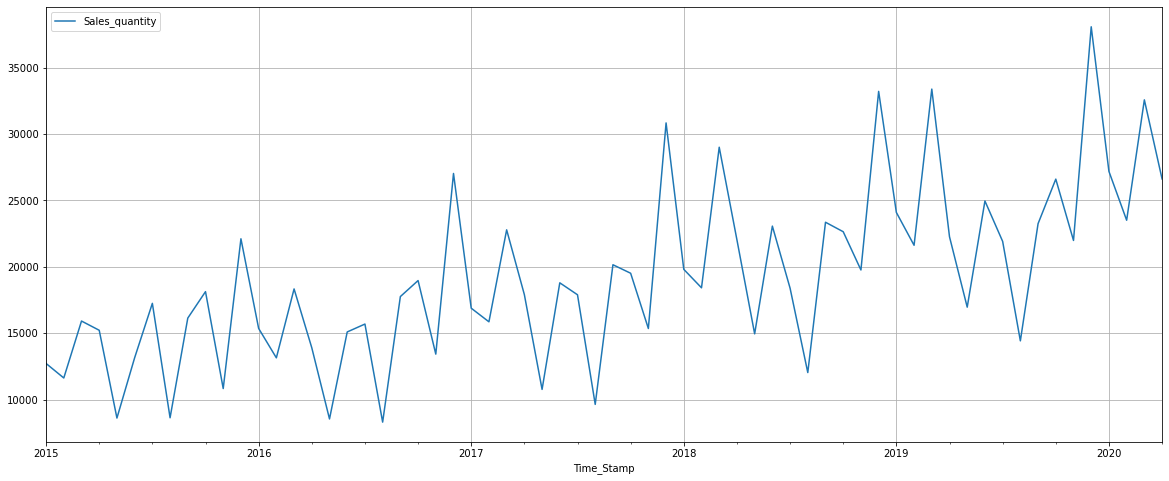

In [9]:
df.plot(grid=True);

We can see that there is a trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [10]:
df.describe()

,Sales_quantity
count,64.000000
mean,19197.375000
std,6591.287257
min,8314.000000
25%,15065.500000
50%,18368.000000
75%,22856.250000
max,38069.000000


The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Decompose the Time Series and plot the different components.

In [11]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

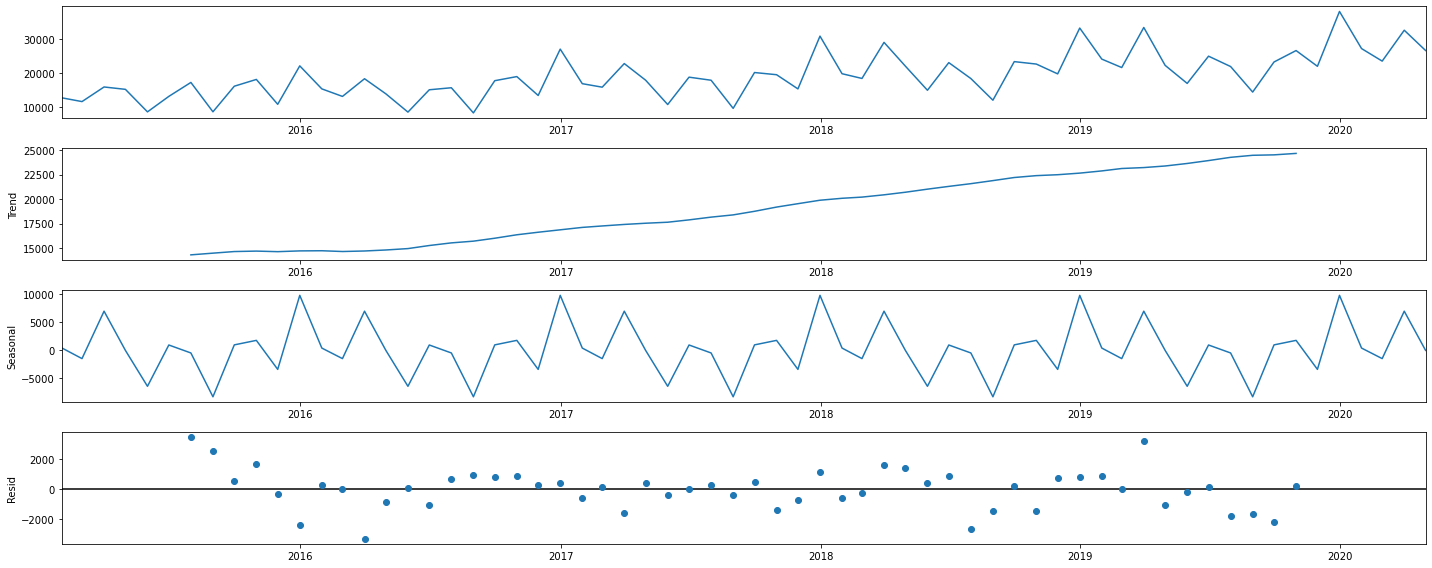

In [12]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

We see that the residuals have a pattern in this decomposition.

In [13]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2015-01-31     334.942708
2015-02-28   -1548.182292
2015-03-31    6928.213542
2015-04-30     -81.796875
2015-05-31   -6501.359375
2015-06-30     883.578125
2015-07-31    -540.938542
2015-08-31   -8376.538542
2015-09-30     905.194792
2015-10-31    1709.969792
2015-11-30   -3474.494792
2015-12-31    9761.411458
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2015-01-31            NaN
2015-02-28            NaN
2015-03-31            NaN
2015-04-30            NaN
2015-05-31            NaN
2015-06-30            NaN
2015-07-31    3483.188542
2015-08-31    2533.746875
2015-09-30     590.096875
2

### Multiplicative Decomposition

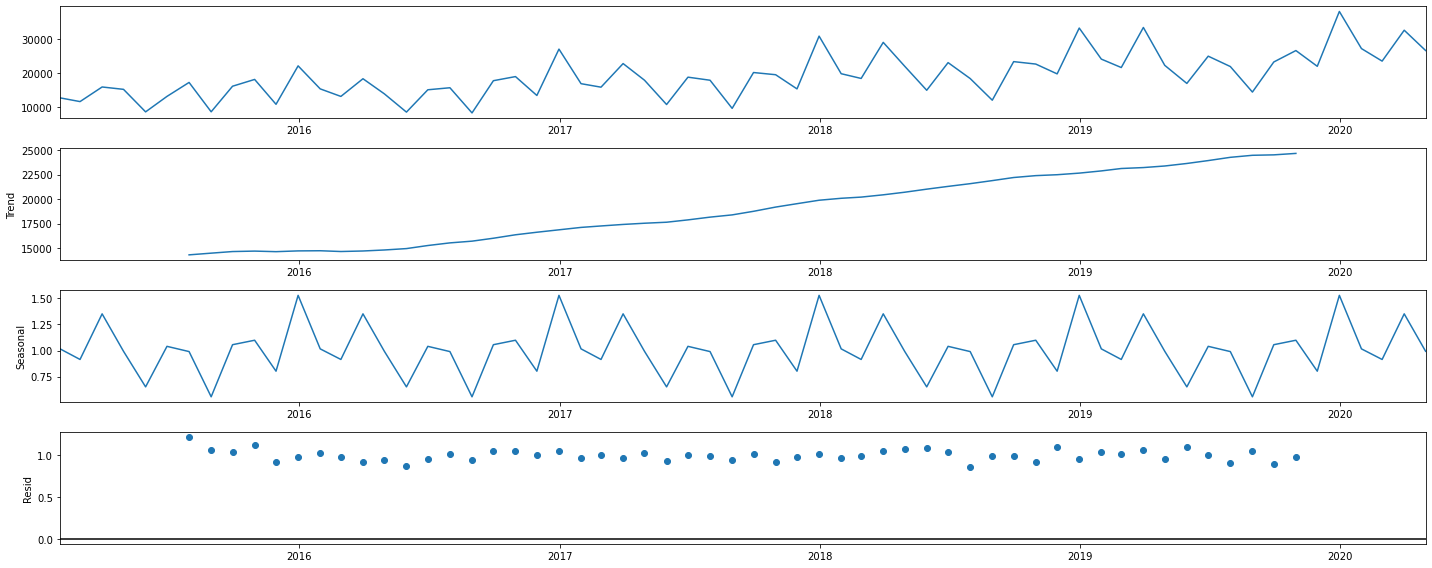

In [14]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [15]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2015-01-31             NaN
2015-02-28             NaN
2015-03-31             NaN
2015-04-30             NaN
2015-05-31             NaN
2015-06-30             NaN
2015-07-31    14311.750000
2015-08-31    14484.791667
2015-09-30    14648.708333
2015-10-31    14694.500000
2015-11-30    14636.791667
2015-12-31    14714.875000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2015-01-31    1.016014
2015-02-28    0.914684
2015-03-31    1.351165
2015-04-30    0.992906
2015-05-31    0.652248
2015-06-30    1.040221
2015-07-31    0.990120
2015-08-31    0.557343
2015-09-30    1.055952
2015-10-31    1.098610
2015-11-30    0.802419
2015-12-31    1.528319
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2015-01-31         NaN
2015-02-28         NaN
2015-03-31         NaN
2015-04-30         NaN
2015-05-31         NaN
2015-06-30         NaN
2015-07-31    1.217613
2015-08-31    1.070482
2015-09-30    1.043681
2015-10-31    1.123361
2015-11-30    0.923043
2015-12-31    0.98

For the multiplicative series, we see that a lot of residuals are located around 1.

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.531
DF test p-value is 0.312607127780437
Number of lags used 11


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [18]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -9.267
DF test p-value is 9.130089570108654e-14
Number of lags used 10


Now, let us go ahead and plot the stationary series.

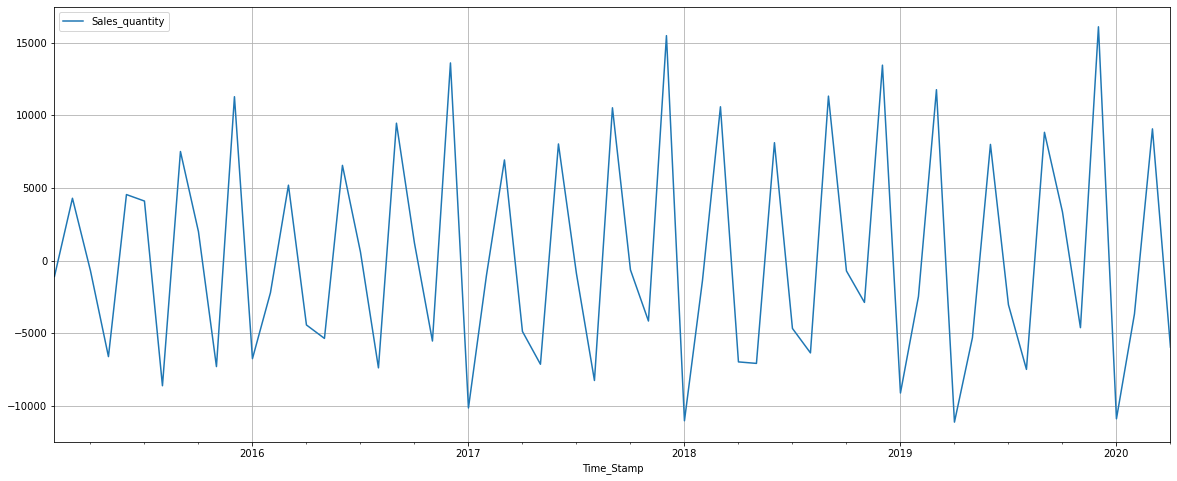

In [19]:
df.diff().dropna().plot(grid=True);

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

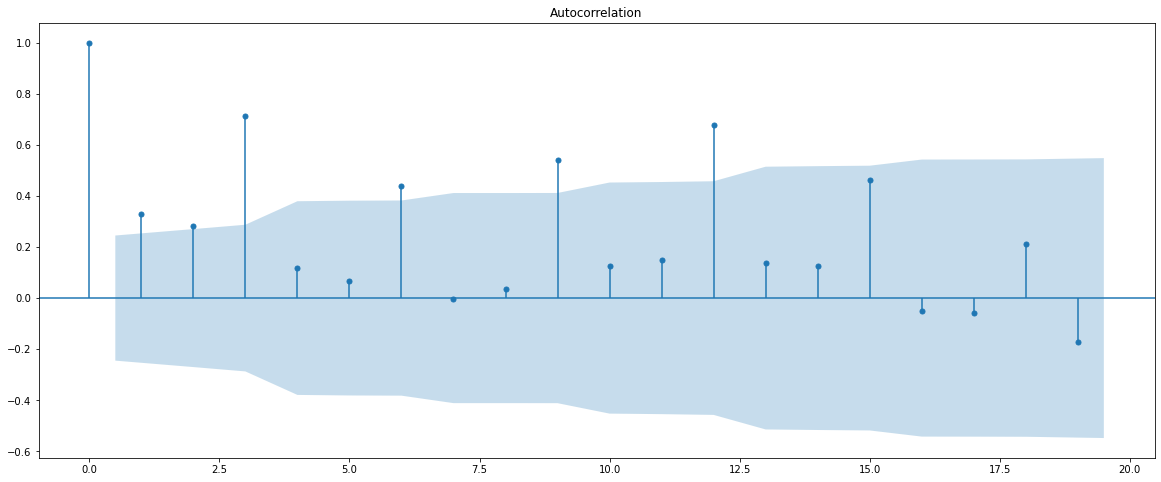

In [21]:
plot_acf(df,alpha=0.05);

From the above plots, we can say that there seems to be a seasonality in the data.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


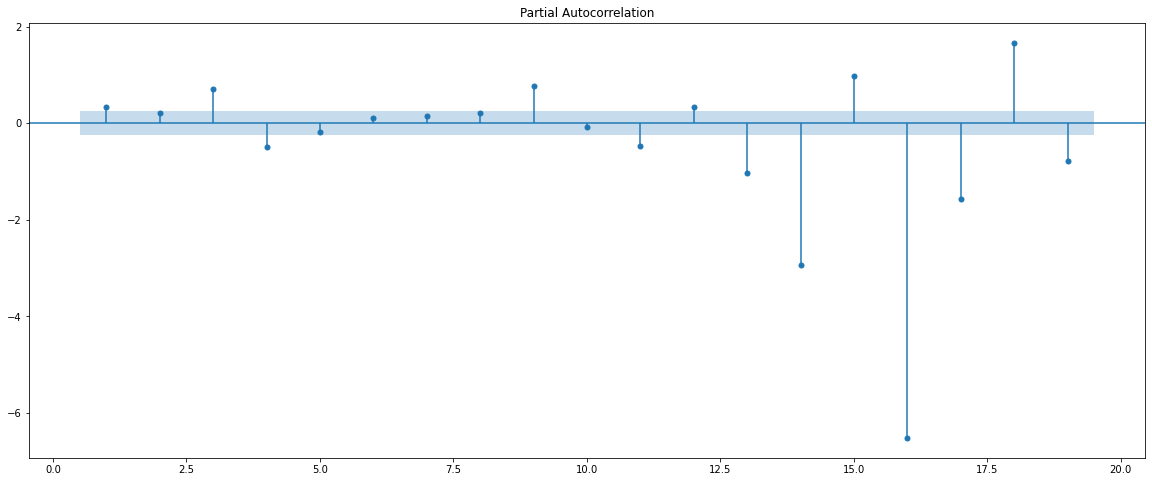

In [22]:
plot_pacf(df,zero=False,alpha=0.05);

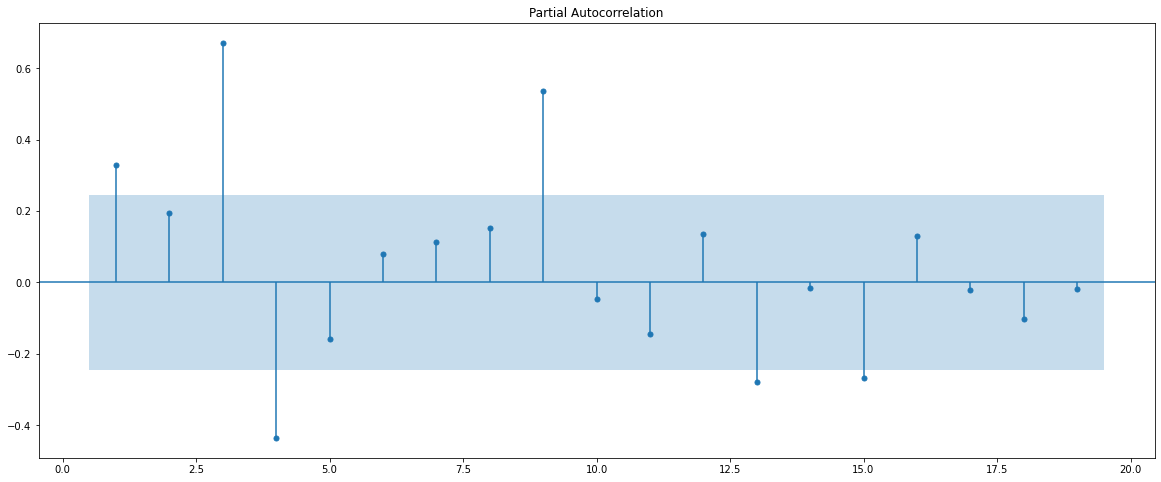

In [23]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [24]:
df.index.year.unique()

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='Time_Stamp')

In [25]:
train = df[df.index<='2019'] 
test = df[df.index>'2019']

In [26]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [27]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sales_quantity
Time_Stamp,
2015-01-31,12729
2015-02-28,11636
2015-03-31,15922
2015-04-30,15227
2015-05-31,8620


Last few rows of Training Data


,Sales_quantity
Time_Stamp,
2018-08-31,12045
2018-09-30,23358
2018-10-31,22644
2018-11-30,19765
2018-12-31,33207


First few rows of Test Data


,Sales_quantity
Time_Stamp,
2019-01-31,24096
2019-02-28,21624
2019-03-31,33379
2019-04-30,22265
2019-05-31,16967


Last few rows of Test Data


,Sales_quantity
Time_Stamp,
2019-12-31,38069
2020-01-31,27184
2020-02-29,23509
2020-03-31,32569
2020-04-30,26615


In [28]:
print(train.shape)
print(test.shape)

(48, 1)
(16, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

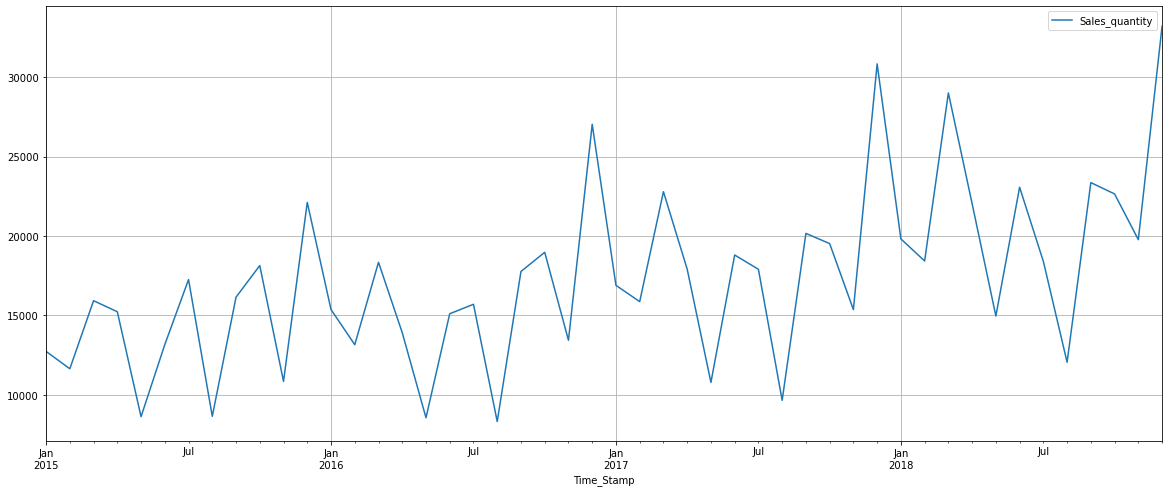

In [29]:
train.plot(grid=True);

In [30]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.419
DF test p-value is 0.8553111705791601
Number of lags used 10


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [31]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -10.821
DF test p-value is 4.9223220486532713e-17
Number of lags used 10


Now, let us go ahead and plot the differenced training data.

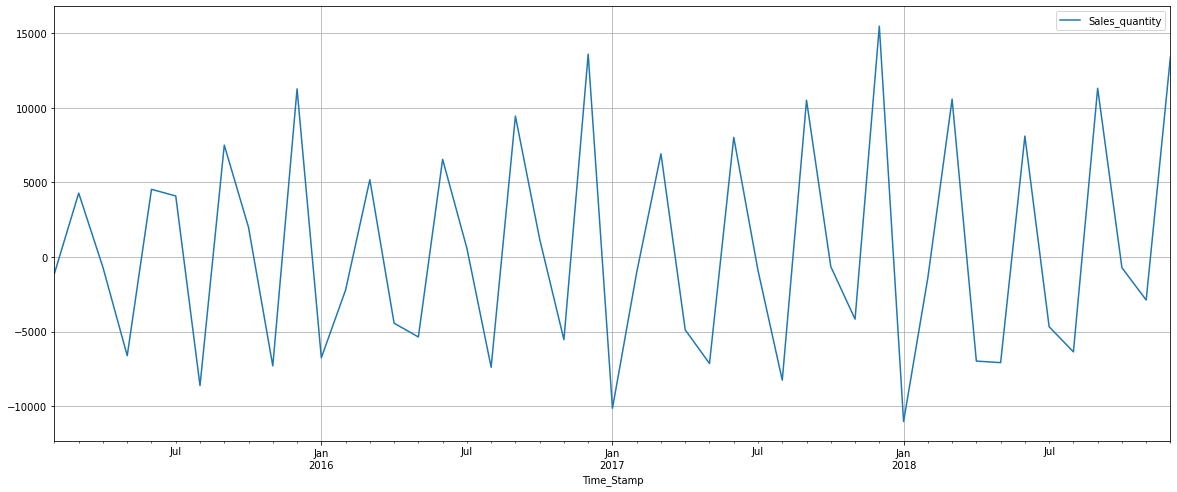

In [32]:
train.diff().dropna().plot(grid=True);

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2015-01-31 to 2018-12-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sales_quantity  48 non-null     int64
dtypes: int64(1)
memory usage: 768.0 bytes


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [34]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [35]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [36]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sales_quantity'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:970.5800792205061
ARIMA(0, 1, 1) - AIC:946.3747183841473
ARIMA(0, 1, 2) - AIC:938.9401325652516
ARIMA(0, 1, 3) - AIC:936.7086994131739
ARIMA(1, 1, 0) - AIC:960.054023108071
ARIMA(1, 1, 1) - AIC:947.2909679438254


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) - AIC:946.6935728826827


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3) - AIC:934.564191761015
ARIMA(2, 1, 0) - AIC:927.6243792519236
ARIMA(2, 1, 1) - AIC:924.6612101403742
ARIMA(2, 1, 2) - AIC:912.7956223396401
ARIMA(2, 1, 3) - AIC:917.4649014534577
ARIMA(3, 1, 0) - AIC:922.496739993919
ARIMA(3, 1, 1) - AIC:924.4464860408016
ARIMA(3, 1, 2) - AIC:916.9388174513862


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 3) - AIC:916.0052408409878


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",912.795622
15,"(3, 1, 3)",916.005241
14,"(3, 1, 2)",916.938817
11,"(2, 1, 3)",917.464901
12,"(3, 1, 0)",922.496740


In [38]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -451.398
Date:                Sun, 01 Aug 2021   AIC                            912.796
Time:                        03:53:50   BIC                            922.046
Sample:                    01-31-2015   HQIC                           916.277
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9869      0.035    -28.118      0.000      -1.056      -0.918
ar.L2         -0.9671      0.023    -41.201      0.000      -1.013      -0.921
ma.L1          0.6901      0.131      5.282      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Diagnostics plot.

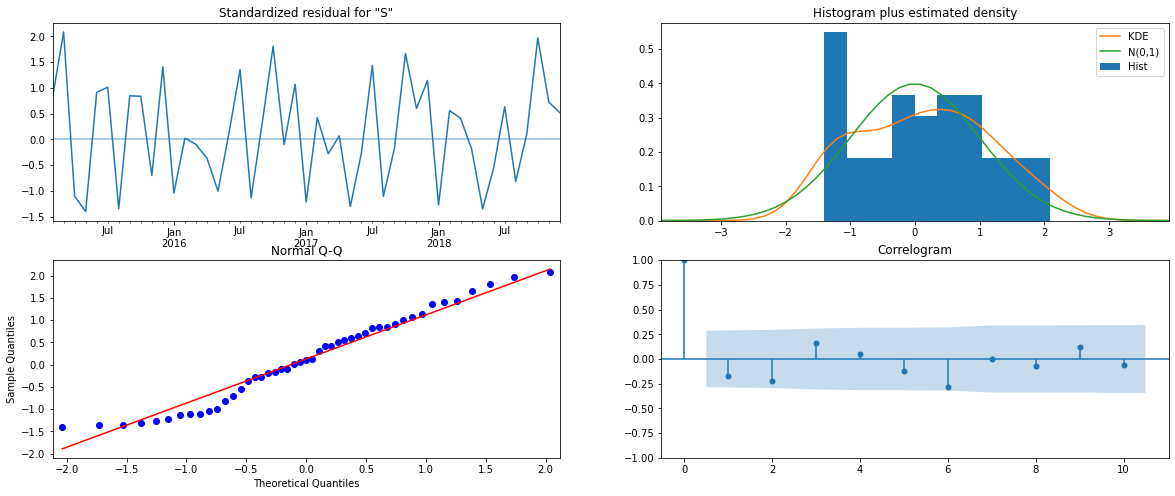

In [39]:
results_auto_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [40]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [41]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [42]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4400.537139357595 
MAPE: 14.606968400300582


In [43]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968


## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

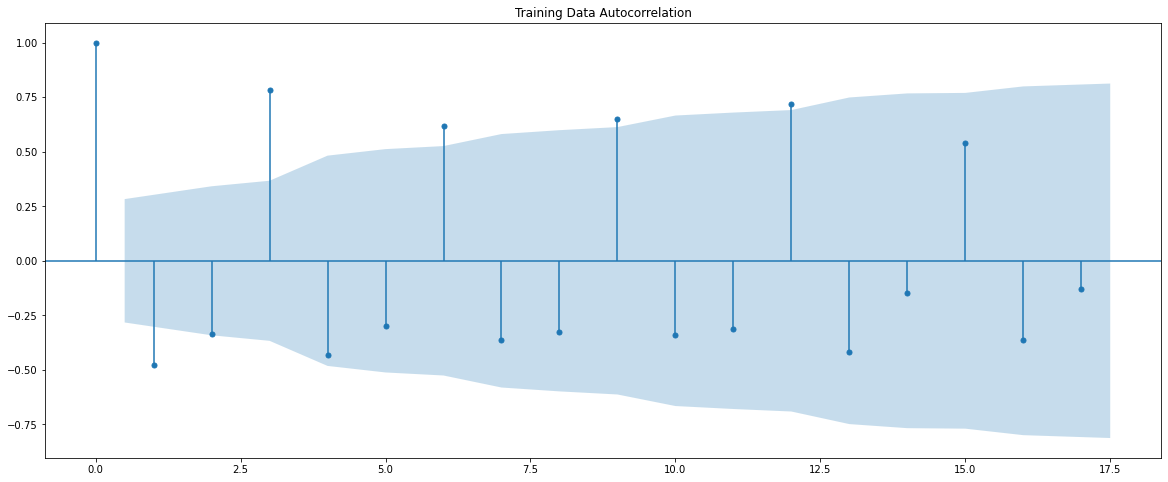

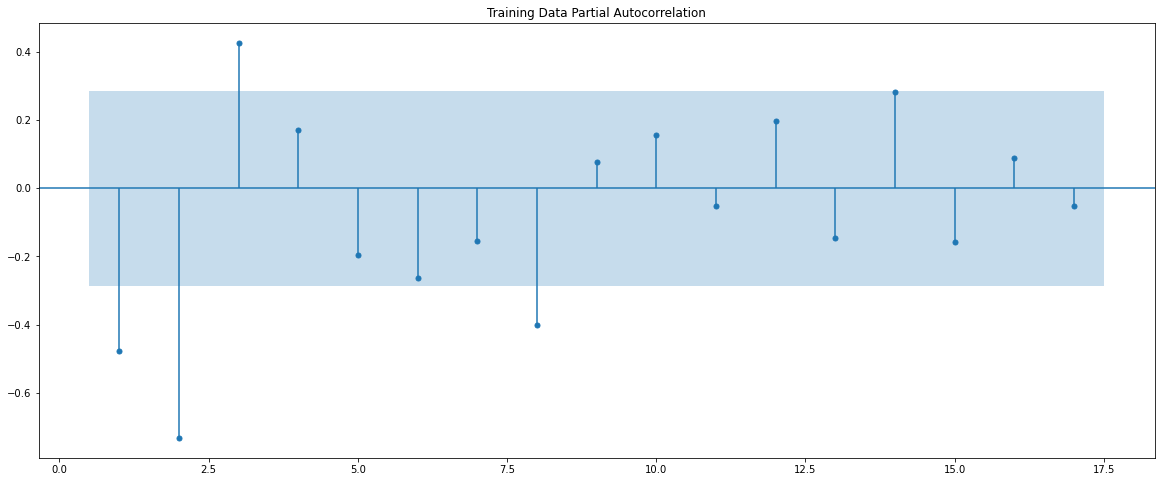

In [44]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [45]:
manual_ARIMA = ARIMA(train['Sales_quantity'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         Sales_quantity   No. Observations:                   48
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -451.003
Date:                Sun, 01 Aug 2021   AIC                            916.005
Time:                        03:56:11   BIC                            928.956
Sample:                    01-31-2015   HQIC                           920.879
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3015      0.355     -0.850      0.395      -0.997       0.394
ar.L2         -0.2919      0.338     -0.863      0.388      -0.955       0.371
ar.L3          0.6602      0.344      1.918      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Let us analyse the residuals from the various diagnostics plot.

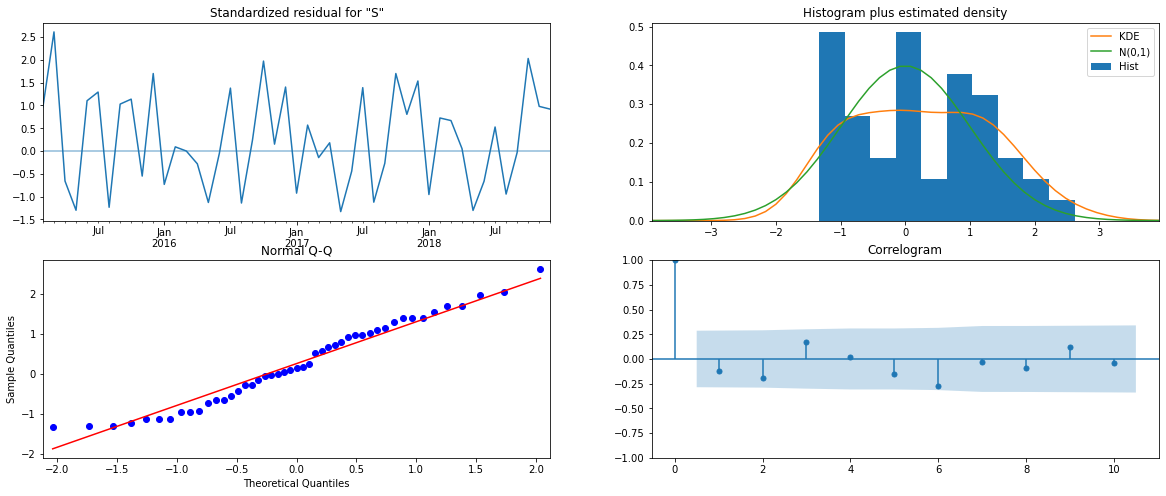

In [46]:
results_manual_ARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [47]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [48]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4091.911987324296 
MAPE: 14.384778655265801


In [49]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779


## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

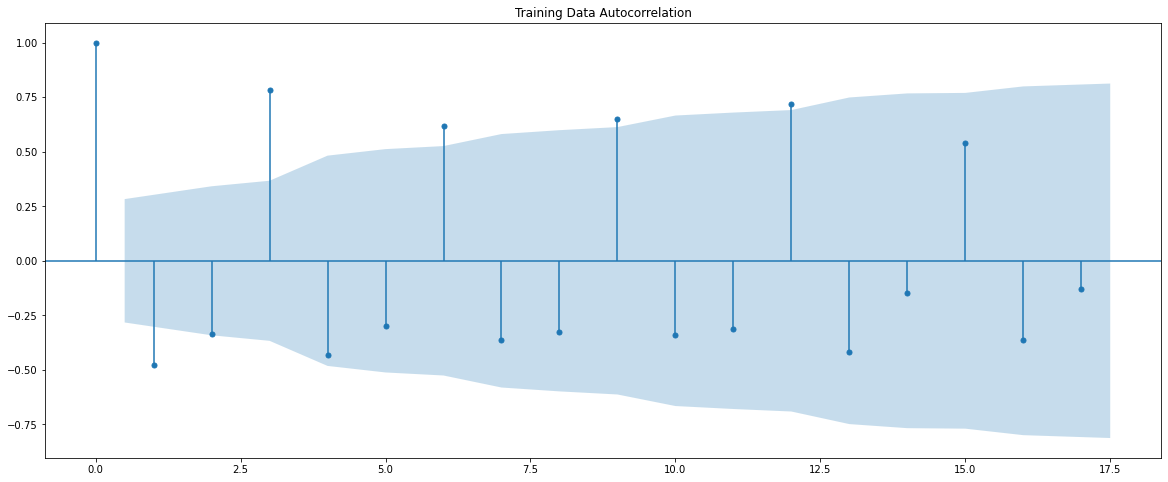

In [50]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [51]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [52]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [53]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales_quantity'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:950.9698819117601
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:824.6387628791792


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1405.0052693014372
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:566.0463827837618
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:826.8368008474987
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:796.0758231748734
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:657.0853263038941
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:523.8434054742415
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:627.0035938265593
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:626.5860152586523
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:612.0998480423189
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:500.1786582209929
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:514.6367326495093
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:511.53226449686065
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:513.3053667110651
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:495.1762340525424
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:910.6959030043946
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:791.9136892949963


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1333.0298805834705
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:546.1317843089903
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:829.0266258911589
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:766.8611402291923
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:620.9856494124286
SARIMA(0, 1, 1)x(1, 0, 3, 6) - AIC:504.83249543847154
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:627.2022925531417
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:626.7061925246824
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:592.8244177922513
SARIMA(0, 1, 1)x(2, 0, 3, 6) - AIC:482.7906045528083
SARIMA(0, 1, 1)x(3, 0, 0, 6) - AIC:514.9278061334497
SARIMA(0, 1, 1)x(3, 0, 1, 6) - AIC:514.5970264209811
SARIMA(0, 1, 1)x(3, 0, 2, 6) - AIC:514.0913500190552
SARIMA(0, 1, 1)x(3, 0, 3, 6) - AIC:479.79854017602594
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:886.7713285814862
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:768.5578871701
SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1430.8216350291495
SARIMA(0, 1, 2)x(0, 0, 3, 6) - AIC:506.8428229645389
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:806.507931

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 2, 6) - AIC:1306.6578092258987
SARIMA(0, 1, 3)x(0, 0, 3, 6) - AIC:508.07346464181234
SARIMA(0, 1, 3)x(1, 0, 0, 6) - AIC:826.4312834173895
SARIMA(0, 1, 3)x(1, 0, 1, 6) - AIC:727.1814118772987
SARIMA(0, 1, 3)x(1, 0, 2, 6) - AIC:580.0832748532474
SARIMA(0, 1, 3)x(1, 0, 3, 6) - AIC:461.8960671165116
SARIMA(0, 1, 3)x(2, 0, 0, 6) - AIC:628.8146778706861
SARIMA(0, 1, 3)x(2, 0, 1, 6) - AIC:623.8304387195072
SARIMA(0, 1, 3)x(2, 0, 2, 6) - AIC:552.3010930554057
SARIMA(0, 1, 3)x(2, 0, 3, 6) - AIC:443.8805404160674
SARIMA(0, 1, 3)x(3, 0, 0, 6) - AIC:516.6029111278191
SARIMA(0, 1, 3)x(3, 0, 1, 6) - AIC:516.1846211384138
SARIMA(0, 1, 3)x(3, 0, 2, 6) - AIC:513.8067133979405
SARIMA(0, 1, 3)x(3, 0, 3, 6) - AIC:459.63732810773837
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:940.0451530415274
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:813.8083525628697


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1590.3288246858544
SARIMA(1, 1, 0)x(0, 0, 3, 6) - AIC:552.8933777224654
SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:803.2602408952839
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:784.10505294614
SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:636.6070381425478
SARIMA(1, 1, 0)x(1, 0, 3, 6) - AIC:557.610925638634
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:608.2801046522006
SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:609.0641904561822
SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:610.6259548437537
SARIMA(1, 1, 0)x(2, 0, 3, 6) - AIC:501.1847797522852
SARIMA(1, 1, 0)x(3, 0, 0, 6) - AIC:498.1105247211755
SARIMA(1, 1, 0)x(3, 0, 1, 6) - AIC:493.10608024433407
SARIMA(1, 1, 0)x(3, 0, 2, 6) - AIC:495.0534501765675
SARIMA(1, 1, 0)x(3, 0, 3, 6) - AIC:497.0121236292166
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:908.199099873353
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:790.7750892547884


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1350.3082964802736
SARIMA(1, 1, 1)x(0, 0, 3, 6) - AIC:530.5895141717641
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:805.6296507291278
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:765.828562644267
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:620.9182359795122
SARIMA(1, 1, 1)x(1, 0, 3, 6) - AIC:540.9424438829759
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:609.4062338537447
SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:610.624116150343
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:591.2268841574156
SARIMA(1, 1, 1)x(2, 0, 3, 6) - AIC:480.1229259803244
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:500.1074427682806
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:498.8881776001867
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:497.2005818751926
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:476.22397282190445
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:890.9398669162387
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:773.4008160277306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1535.2432129779095
SARIMA(1, 1, 2)x(0, 0, 3, 6) - AIC:511.28502095928496
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:802.9325753167709
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:746.5209557256429
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:599.8613052975636
SARIMA(1, 1, 2)x(1, 0, 3, 6) - AIC:524.5910602060721
SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:607.5947673461833
SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:608.1467129588158
SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:568.7754138683572
SARIMA(1, 1, 2)x(2, 0, 3, 6) - AIC:465.1382832416964
SARIMA(1, 1, 2)x(3, 0, 0, 6) - AIC:498.483122159769
SARIMA(1, 1, 2)x(3, 0, 1, 6) - AIC:497.675920863851
SARIMA(1, 1, 2)x(3, 0, 2, 6) - AIC:497.43412811796856
SARIMA(1, 1, 2)x(3, 0, 3, 6) - AIC:466.1762561768228
SARIMA(1, 1, 3)x(0, 0, 0, 6) - AIC:861.872459558723
SARIMA(1, 1, 3)x(0, 0, 1, 6) - AIC:743.9926132920527


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 2, 6) - AIC:1375.4408484949658
SARIMA(1, 1, 3)x(0, 0, 3, 6) - AIC:486.8583710073079
SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:783.3313031783908
SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:723.5180726652316
SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:586.0830976725745
SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:469.3016918305679
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:605.8242549379445
SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:606.530360456078
SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:554.2872678518054
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:445.2585312519757
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:500.32487502907543
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:495.2340034462604
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:500.6426221328136
SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:445.50436737187607
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:878.8626858473185
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:780.3755240767889


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1359.0324038572528
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:534.0487964710634
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:746.3124744016498
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:743.9800123070756
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:650.4352416730727
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:515.5514934313596
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:588.1197235399666
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:590.1080869471257
SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:591.2086557121945
SARIMA(2, 1, 0)x(2, 0, 3, 6) - AIC:499.46745021656915
SARIMA(2, 1, 0)x(3, 0, 0, 6) - AIC:482.0409418639546
SARIMA(2, 1, 0)x(3, 0, 1, 6) - AIC:477.9011036567643
SARIMA(2, 1, 0)x(3, 0, 2, 6) - AIC:479.887455820231
SARIMA(2, 1, 0)x(3, 0, 3, 6) - AIC:481.79627385532535
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:876.3752393054648
SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:759.0326521869642


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1389.3705832501091
SARIMA(2, 1, 1)x(0, 0, 3, 6) - AIC:515.2459818587744
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:745.4469737621549
SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:760.9587471112023
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:618.6604382375622
SARIMA(2, 1, 1)x(1, 0, 3, 6) - AIC:499.7860965775338
SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:581.2365800438884
SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:583.2091685527896
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:583.126538012589
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:483.10849833521405
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:480.98071866864996
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:479.5558935454928
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:482.0258471501098
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:483.88351121228146
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:847.5617616999649
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:725.0021285449415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1323.01081055363
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:497.0652996770083
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:733.8170315354155
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:713.5993860100939
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:601.2929518092457
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:493.4182578160231
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:575.7259580175614
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:590.1732375904841
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:567.4068135828336
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:466.7468329134562
SARIMA(2, 1, 2)x(3, 0, 0, 6) - AIC:482.19847553598225
SARIMA(2, 1, 2)x(3, 0, 1, 6) - AIC:478.0140882728267
SARIMA(2, 1, 2)x(3, 0, 2, 6) - AIC:483.91164322738524
SARIMA(2, 1, 2)x(3, 0, 3, 6) - AIC:463.98259897380376
SARIMA(2, 1, 3)x(0, 0, 0, 6) - AIC:832.7214529322115
SARIMA(2, 1, 3)x(0, 0, 1, 6) - AIC:714.5980496327601


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 2, 6) - AIC:1428.7948684261278
SARIMA(2, 1, 3)x(0, 0, 3, 6) - AIC:486.5041459565448
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:745.2742081503374
SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:706.169888993181
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:594.7375527023512
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:484.7769733170163
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:582.6264900708219
SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:579.5804711712758
SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:546.214419361991
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:447.305493008926
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:477.6748434137257
SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:470.9525479803592
SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:482.8150938116152
SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:454.4420739314674
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:855.2910835206819
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:775.9550658698522


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1459.0544396701705
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:537.8385527932792
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:726.7532205844484
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:723.8159003758835
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:637.0493104237777
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:515.1418837569023
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:563.6240693196546
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC:565.5524361839146
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC:565.7395028259937
SARIMA(3, 1, 0)x(2, 0, 3, 6) - AIC:499.7535061224788
SARIMA(3, 1, 0)x(3, 0, 0, 6) - AIC:465.15735740132743
SARIMA(3, 1, 0)x(3, 0, 1, 6) - AIC:466.9970295436388
SARIMA(3, 1, 0)x(3, 0, 2, 6) - AIC:464.06234322167796
SARIMA(3, 1, 0)x(3, 0, 3, 6) - AIC:465.9951460156246
SARIMA(3, 1, 1)x(0, 0, 0, 6) - AIC:857.0162163611482
SARIMA(3, 1, 1)x(0, 0, 1, 6) - AIC:757.0132021374122


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 2, 6) - AIC:1062.78934478453
SARIMA(3, 1, 1)x(0, 0, 3, 6) - AIC:513.9656767804248
SARIMA(3, 1, 1)x(1, 0, 0, 6) - AIC:727.5344772144815
SARIMA(3, 1, 1)x(1, 0, 1, 6) - AIC:725.1744677069107
SARIMA(3, 1, 1)x(1, 0, 2, 6) - AIC:607.9697468449928
SARIMA(3, 1, 1)x(1, 0, 3, 6) - AIC:500.39256583675564
SARIMA(3, 1, 1)x(2, 0, 0, 6) - AIC:564.8081355104875
SARIMA(3, 1, 1)x(2, 0, 1, 6) - AIC:567.9081310062986
SARIMA(3, 1, 1)x(2, 0, 2, 6) - AIC:569.0627830647043
SARIMA(3, 1, 1)x(2, 0, 3, 6) - AIC:485.9770234259097
SARIMA(3, 1, 1)x(3, 0, 0, 6) - AIC:466.40322098997495
SARIMA(3, 1, 1)x(3, 0, 1, 6) - AIC:463.9813463101253
SARIMA(3, 1, 1)x(3, 0, 2, 6) - AIC:468.48250953436974
SARIMA(3, 1, 1)x(3, 0, 3, 6) - AIC:465.4967510436872
SARIMA(3, 1, 2)x(0, 0, 0, 6) - AIC:841.9055380326547
SARIMA(3, 1, 2)x(0, 0, 1, 6) - AIC:726.7147724905373


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 2, 6) - AIC:1595.6486841442277
SARIMA(3, 1, 2)x(0, 0, 3, 6) - AIC:498.6227790534461
SARIMA(3, 1, 2)x(1, 0, 0, 6) - AIC:716.5086592189201
SARIMA(3, 1, 2)x(1, 0, 1, 6) - AIC:714.5121336392758
SARIMA(3, 1, 2)x(1, 0, 2, 6) - AIC:603.2807802655775
SARIMA(3, 1, 2)x(1, 0, 3, 6) - AIC:495.3017965245683
SARIMA(3, 1, 2)x(2, 0, 0, 6) - AIC:560.8560360320314
SARIMA(3, 1, 2)x(2, 0, 1, 6) - AIC:567.6335376180275
SARIMA(3, 1, 2)x(2, 0, 2, 6) - AIC:564.6554982936455
SARIMA(3, 1, 2)x(2, 0, 3, 6) - AIC:465.4340540997125
SARIMA(3, 1, 2)x(3, 0, 0, 6) - AIC:465.35481510606115
SARIMA(3, 1, 2)x(3, 0, 1, 6) - AIC:467.81195036833236
SARIMA(3, 1, 2)x(3, 0, 2, 6) - AIC:466.6785781793165
SARIMA(3, 1, 2)x(3, 0, 3, 6) - AIC:466.18221060481756
SARIMA(3, 1, 3)x(0, 0, 0, 6) - AIC:828.5515152440173
SARIMA(3, 1, 3)x(0, 0, 1, 6) - AIC:704.4933864009689


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 2, 6) - AIC:1205.6499128415865
SARIMA(3, 1, 3)x(0, 0, 3, 6) - AIC:479.2485629555654
SARIMA(3, 1, 3)x(1, 0, 0, 6) - AIC:714.4709357635314
SARIMA(3, 1, 3)x(1, 0, 1, 6) - AIC:691.4700743463465
SARIMA(3, 1, 3)x(1, 0, 2, 6) - AIC:581.9187217922791
SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:475.2969933927104
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:564.6148048287494
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:560.6466177058186
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:546.3966000638773
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:444.6877029324396
SARIMA(3, 1, 3)x(3, 0, 0, 6) - AIC:459.3947471621351
SARIMA(3, 1, 3)x(3, 0, 1, 6) - AIC:457.28310462037854
SARIMA(3, 1, 3)x(3, 0, 2, 6) - AIC:463.62703028134786
SARIMA(3, 1, 3)x(3, 0, 3, 6) - AIC:446.0140404362706


In [54]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
59,"(0, 1, 3)","(2, 0, 3, 6)",443.880540
251,"(3, 1, 3)","(2, 0, 3, 6)",444.687703
123,"(1, 1, 3)","(2, 0, 3, 6)",445.258531
127,"(1, 1, 3)","(3, 0, 3, 6)",445.504367
255,"(3, 1, 3)","(3, 0, 3, 6)",446.014040


In [55]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -211.752
Date:                           Sun, 01 Aug 2021   AIC                            445.504
Time:                                   04:03:54   BIC                            458.912
Sample:                               01-31-2015   HQIC                           449.223
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1582      0.374      0.423      0.673      -0.575       0.892
ma.L1         -0.5099      3.846     -0.133

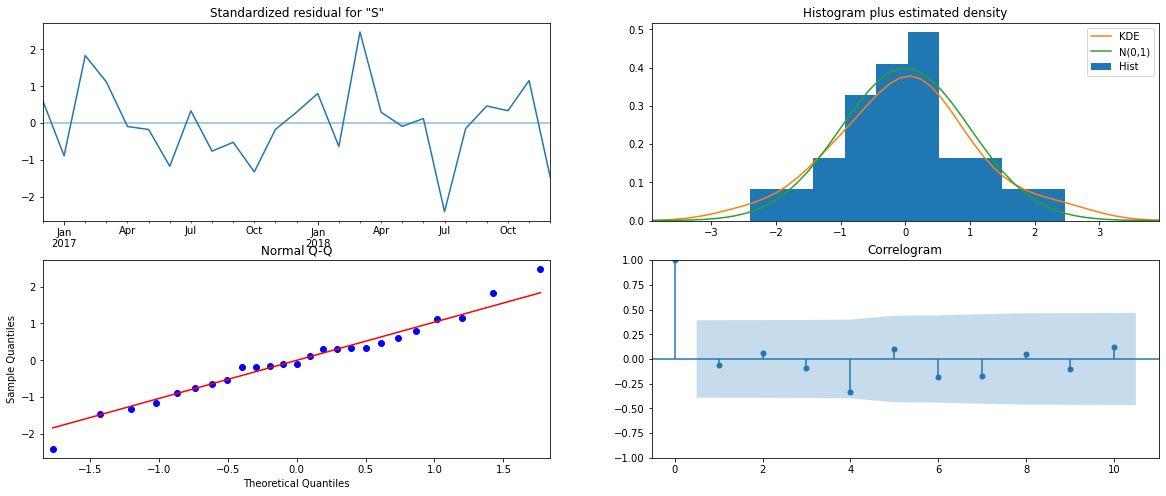

In [56]:
results_auto_SARIMA.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [57]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [58]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2019-01-31,23332.353925,1043.477751,21287.175115,25377.532735
2019-02-28,21032.887788,1086.495059,18903.396602,23162.378974
2019-03-31,33181.020535,1128.091719,30970.001395,35392.039675
2019-04-30,25314.259705,1128.848374,23101.757549,27526.761862
2019-05-31,18185.539090,1128.888551,15972.958188,20398.119991


In [59]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2045.0030663101568 
MAPE: 6.323105554242904


In [60]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779
"SARIMA(1,1,3)(3,0,3,6)",2045.003066,6.323106


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

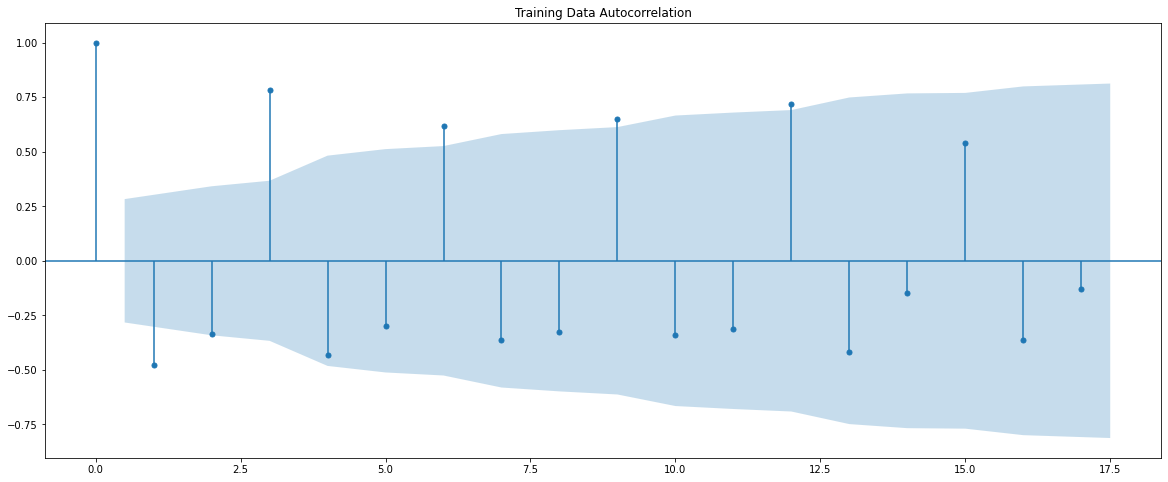

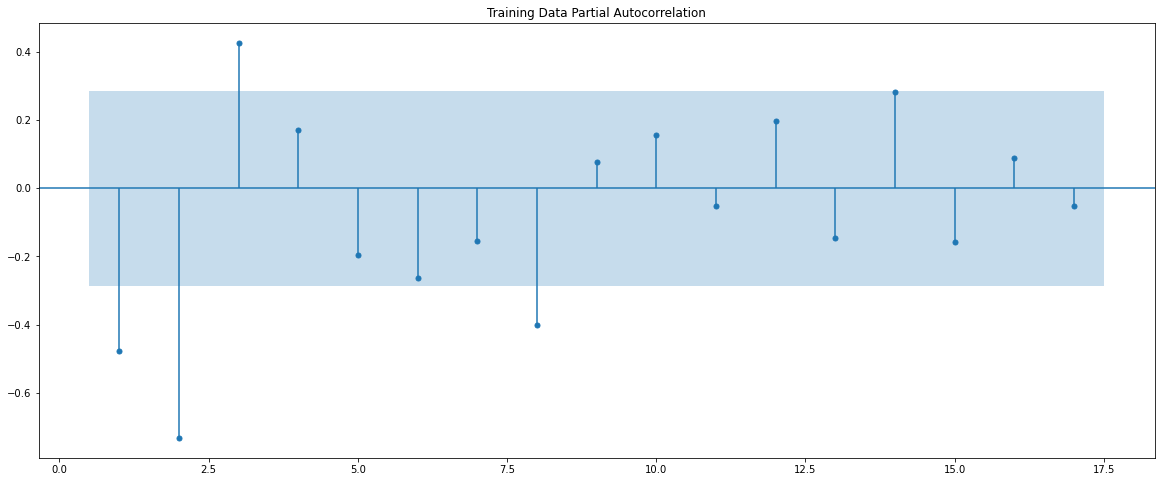

In [61]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [62]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales_quantity'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   48
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -229.624
Date:                           Sun, 01 Aug 2021   AIC                            479.249
Time:                                   04:04:02   BIC                            491.437
Sample:                               01-31-2015   HQIC                           482.629
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4033      2.528     -0.160      0.873      -5.358       4.552
ar.L2         -0.3966      2.539     -0.156

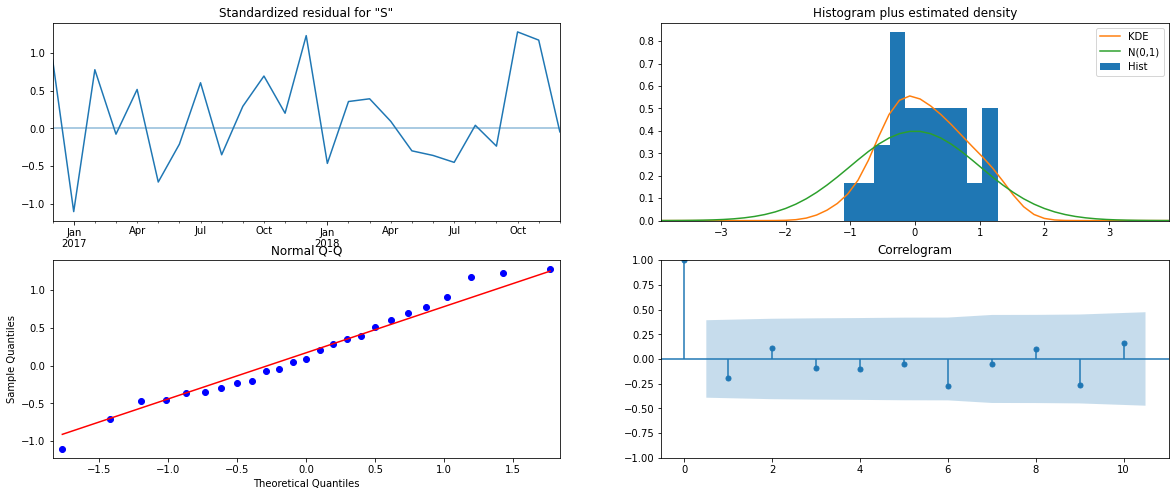

In [63]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [64]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [65]:
rmse = mean_squared_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sales_quantity'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2870.53843154957 
MAPE: 9.367992342702482


In [66]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779
"SARIMA(1,1,3)(3,0,3,6)",2045.003066,6.323106
"SARIMA(3,1,3)(0,0,3,6)",2870.538432,9.367992


This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [67]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sales_quantity'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                    Sales_quantity   No. Observations:                   64
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -357.875
Date:                           Sun, 01 Aug 2021   AIC                            737.750
Time:                                   04:04:35   BIC                            756.600
Sample:                               01-31-2015   HQIC                           744.614
                                    - 04-30-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4644      0.343      1.356      0.175      -0.207       1.136
ma.L1         -1.4722      0.512     -2.878

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 20 months into the future (till the end of next year).

In [68]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [69]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sales_quantity,mean,mean_se,mean_ci_lower,mean_ci_upper
2020-05-31,19842.821179,1451.198609,16998.524170,22687.118187
2020-06-30,26767.620881,1451.020907,23923.672161,29611.569600
2020-07-31,24778.478182,1450.800818,21934.960831,27621.995534
2020-08-31,16831.155784,1450.678080,13987.878994,19674.432574
2020-09-30,25226.025165,1450.606067,22382.889518,28069.160813


In [70]:
rmse = mean_squared_error(df['Sales_quantity'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 3347.0998137443626


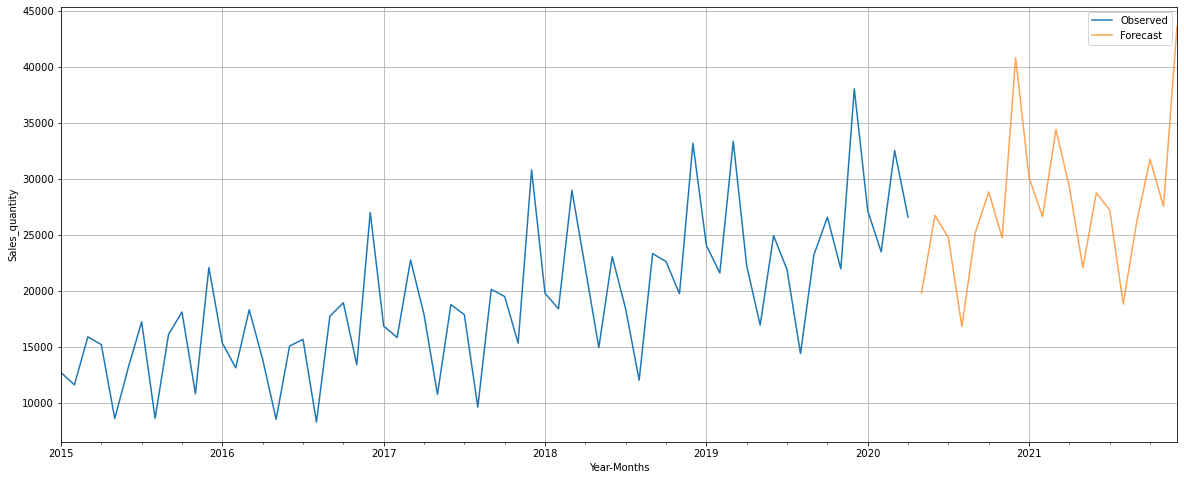

In [71]:
axis = df['Sales_quantity'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales_quantity')
plt.legend(loc='best')
plt.grid();

In [72]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",4400.537139,14.606968
"ARIMA(3,1,3)",4091.911987,14.384779
"SARIMA(1,1,3)(3,0,3,6)",2045.003066,6.323106
"SARIMA(3,1,3)(0,0,3,6)",2870.538432,9.367992


# END